## Importing Libraries

In [123]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import random

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [110]:
# Read the file and use encoding ISO08859-1
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

# Show the first 5 rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Data Exploration

In [111]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Investigate Column Types

In [132]:
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [112]:
# Check for null values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [120]:
# Statistical summary
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [113]:
emotion_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

emotion_counts.head()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

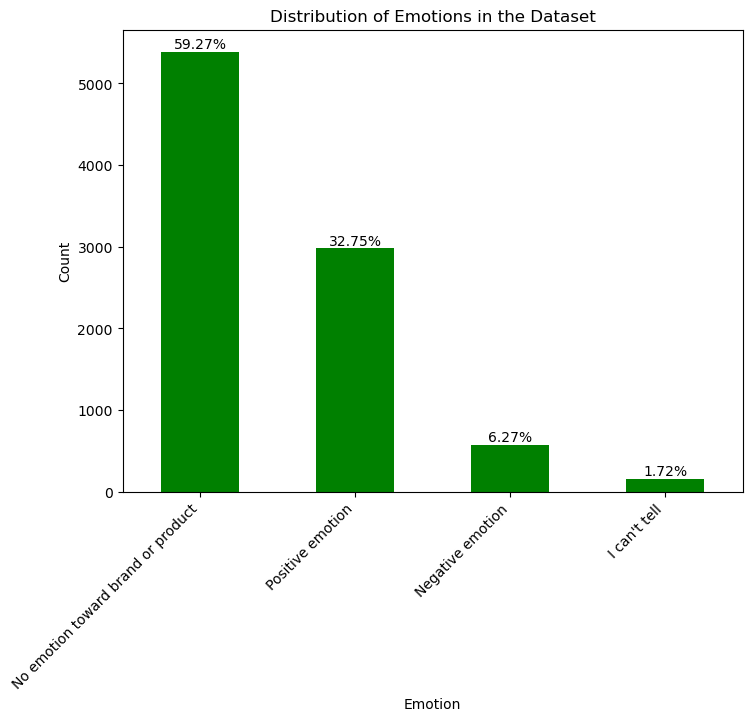

In [114]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color='g')
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

# Add percentage labels
total_tweets = len(df)
for i, count in enumerate(emotion_counts):
    percentage = (count / total_tweets) * 100
    plt.text(i, count + 5, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show();

In [115]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [128]:
text = df['tweet_text']

text.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [127]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_tweets(tweet_series):
    # First, handle any non-string entries
    def convert_to_string(x):
        if pd.isna(x):  # Handle NaN values
            return ""
        return str(x)   # Convert everything else to string
    
    # Convert all entries to strings
    tweets_strings = tweet_series.apply(convert_to_string)
    
    # Convert to lowercase
    tweets_lower = tweets_strings.str.lower()
    
    # Remove URLs
    tweets_no_urls = tweets_lower.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
    
    # Remove mentions (@username)
    tweets_no_mentions = tweets_no_urls.apply(lambda x: re.sub(r'@\w+', '', x))
    
    # Remove hashtags (#topic)
    tweets_no_hashtags = tweets_no_mentions.apply(lambda x: re.sub(r'#\w+', '', x))
    
    # Remove punctuation
    tweets_no_punct = tweets_no_hashtags.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    # Remove numbers
    tweets_no_numbers = tweets_no_punct.apply(lambda x: re.sub(r'\d+', '', x))
    
    # Remove extra whitespace
    tweets_clean = tweets_no_numbers.apply(lambda x: ' '.join(x.split()))
    
    # Tokenization
    tweets_tokenized = tweets_clean.apply(lambda x: word_tokenize(x) if x.strip() else [])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tweets_no_stopwords = tweets_tokenized.apply(lambda x: [word for word in x if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweets_lemmatized = tweets_no_stopwords.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # Concatenate tokens back into sentences
    tweets_final = tweets_lemmatized.apply(lambda x: ' '.join(x))
    
    return tweets_final

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [130]:
cleaned_tweets = clean_tweets(text)

print("Original tweets:\n", text)
print("\nCleaned tweets:\n", cleaned_tweets)

Original tweets:
 0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

Cleaned tweets:
 0       g iphone hr tweeting dead need upgrade plugin ...
1       know awesome ipadiphone app youll likely appre...
2                                          wait also sale
3          hope year festival isnt crashy year iphone app
4       great stuff fri marissa mayer google tim